Enter footing width (in ft):  10
Enter footing length (in ft):  10
Enter depth of footing (in ft):  5
Enter applied load (in lb):  500000
Enter unit weight (in lb/ft³):  120
Enter eccentricity:  0.05
Enter Load inclination (in degrees):  10
Enter distance to slope (in feet):  5
Enter slope angle (H:V ratio):  3


Footing width: 10.0 ft
Footing length: 10.0 ft
Depth of footing: 5.0 ft
Applied load: 500000.0 lb
Unit weight: 120.0 lb/ft³
eccentricity: 0.05 
Unit weight: 10.0 degrees
Unit weight: 5.0 feet
Unit weight: 3.0 


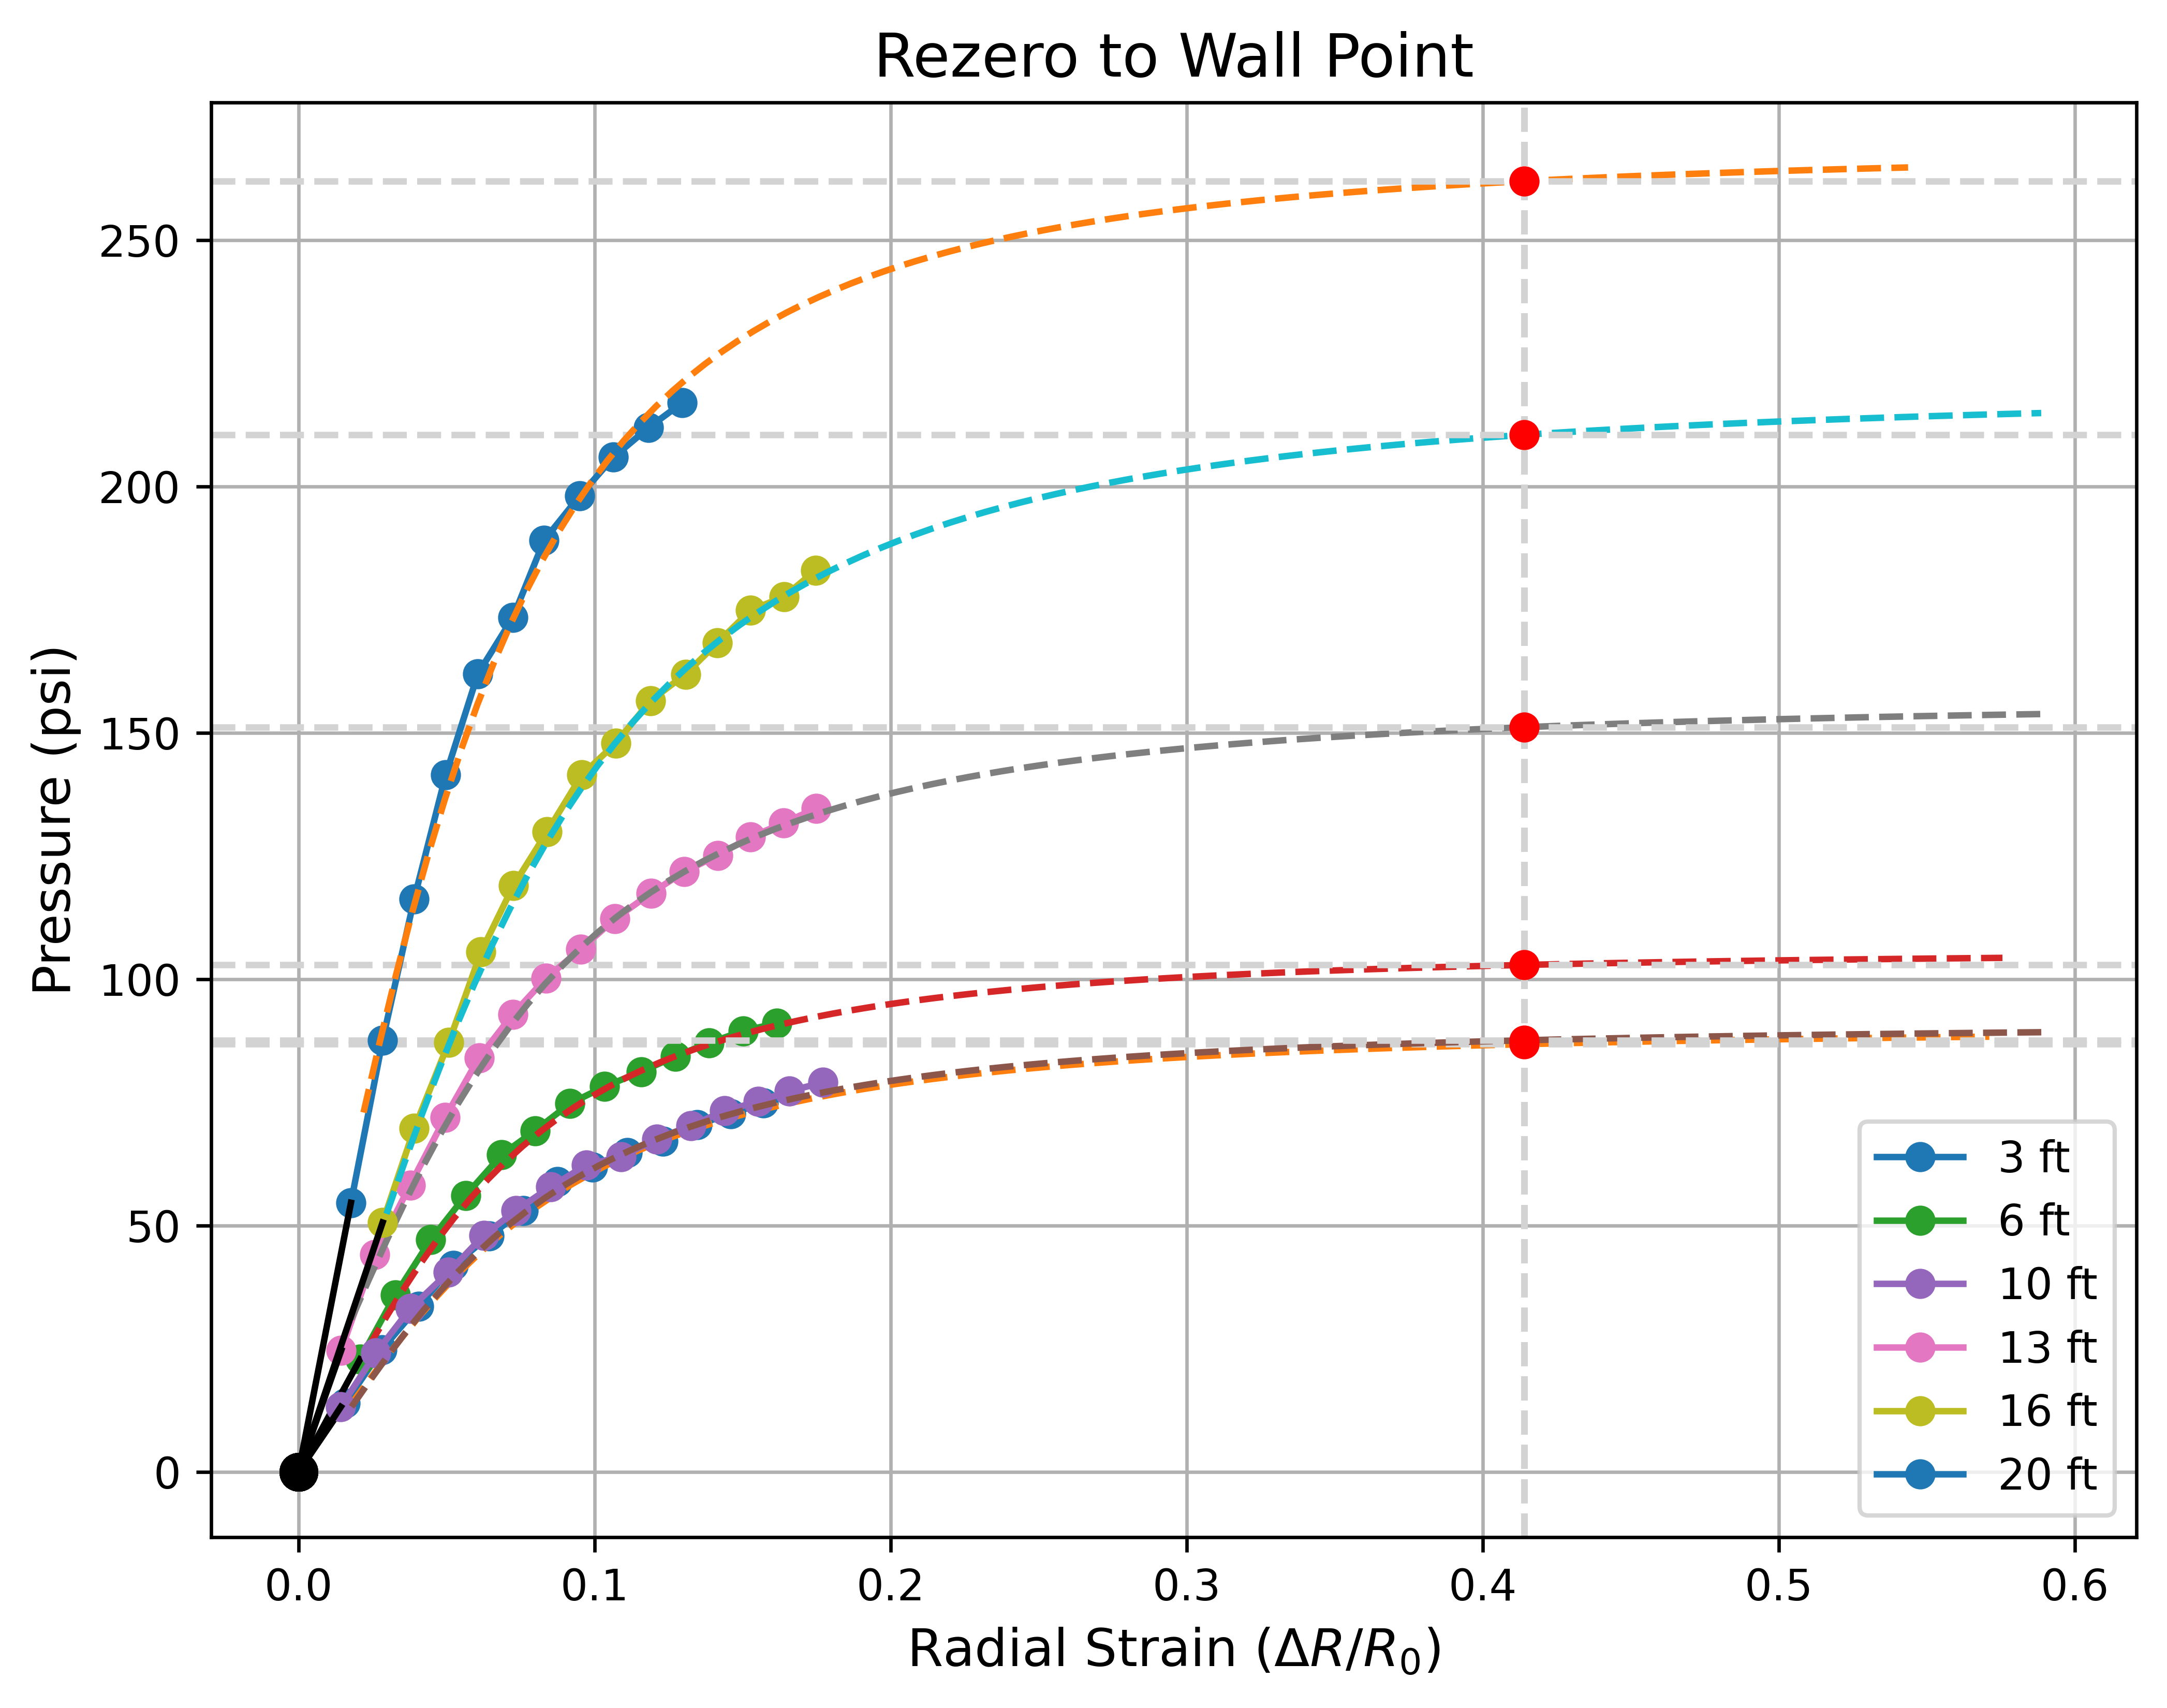

Combined Pressure Table for Specified Strain Levels:
    Strain Level       3 ft        6 ft      10 ft       13 ft       16 ft  \
0       0.000042   0.037049    0.046111   0.038704    0.071738    0.074823   
1       0.005172   4.562636    5.678577   4.766337    8.834485    9.214439   
2       0.010387   9.162760   11.403811   9.571835   17.741557   18.504587   
3       0.021226  18.723901   23.303439  19.559837   36.254485   37.813720   
4       0.031161  26.951807   34.211432  27.989473   50.430643   55.513760   
5       0.042452  34.927934   45.036113  35.811435   63.696171   74.687498   
6       0.062774  47.064157   60.371085  48.090268   85.419197  106.897330   
7       0.084000  57.125329   71.151617  57.362756  100.383200  129.937644   
8       0.127355  68.333584   84.336033  69.036165  120.659569  160.365195   
9       0.169806  75.328167   91.711331  77.887926  133.297752  180.546262   
10      0.210452  79.437098   95.818186  80.213117  139.116101  190.701072   
11      0.2

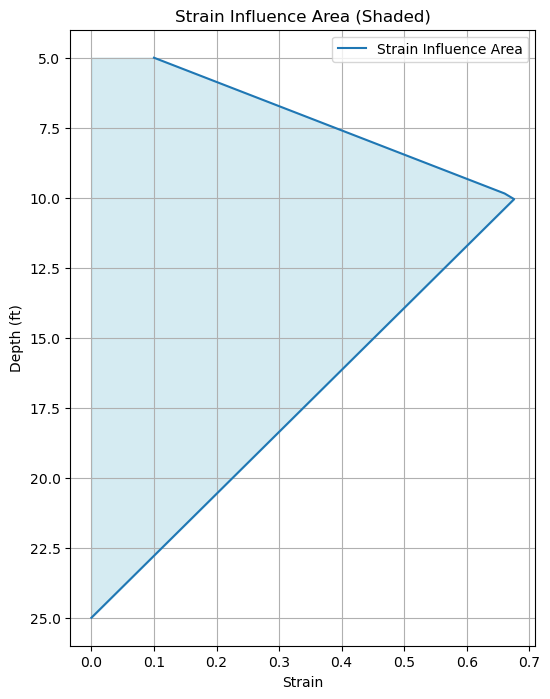

Test depths (ft): [3.0, 6.0, 10.0, 13.0, 16.0, 20.0]
    Strain Level  Weighted Average Pressure  Weighted Average Pressure (kPa)
0       0.000042                   0.068193                         0.470176
1       0.005172                   8.398006                        57.902234
2       0.010387                  16.865012                       116.280208
3       0.021226                  34.463283                       237.616067
4       0.031161                  49.572006                       341.787081
5       0.042452                  64.546733                       445.034235
6       0.062774                  87.592202                       603.927214
7       0.084000                 103.645732                       714.612449
8       0.127355                 123.544240                       851.807885
9       0.169806                 137.158899                       945.677691
10      0.210452                 143.179412                       987.187682
11      0.252903       

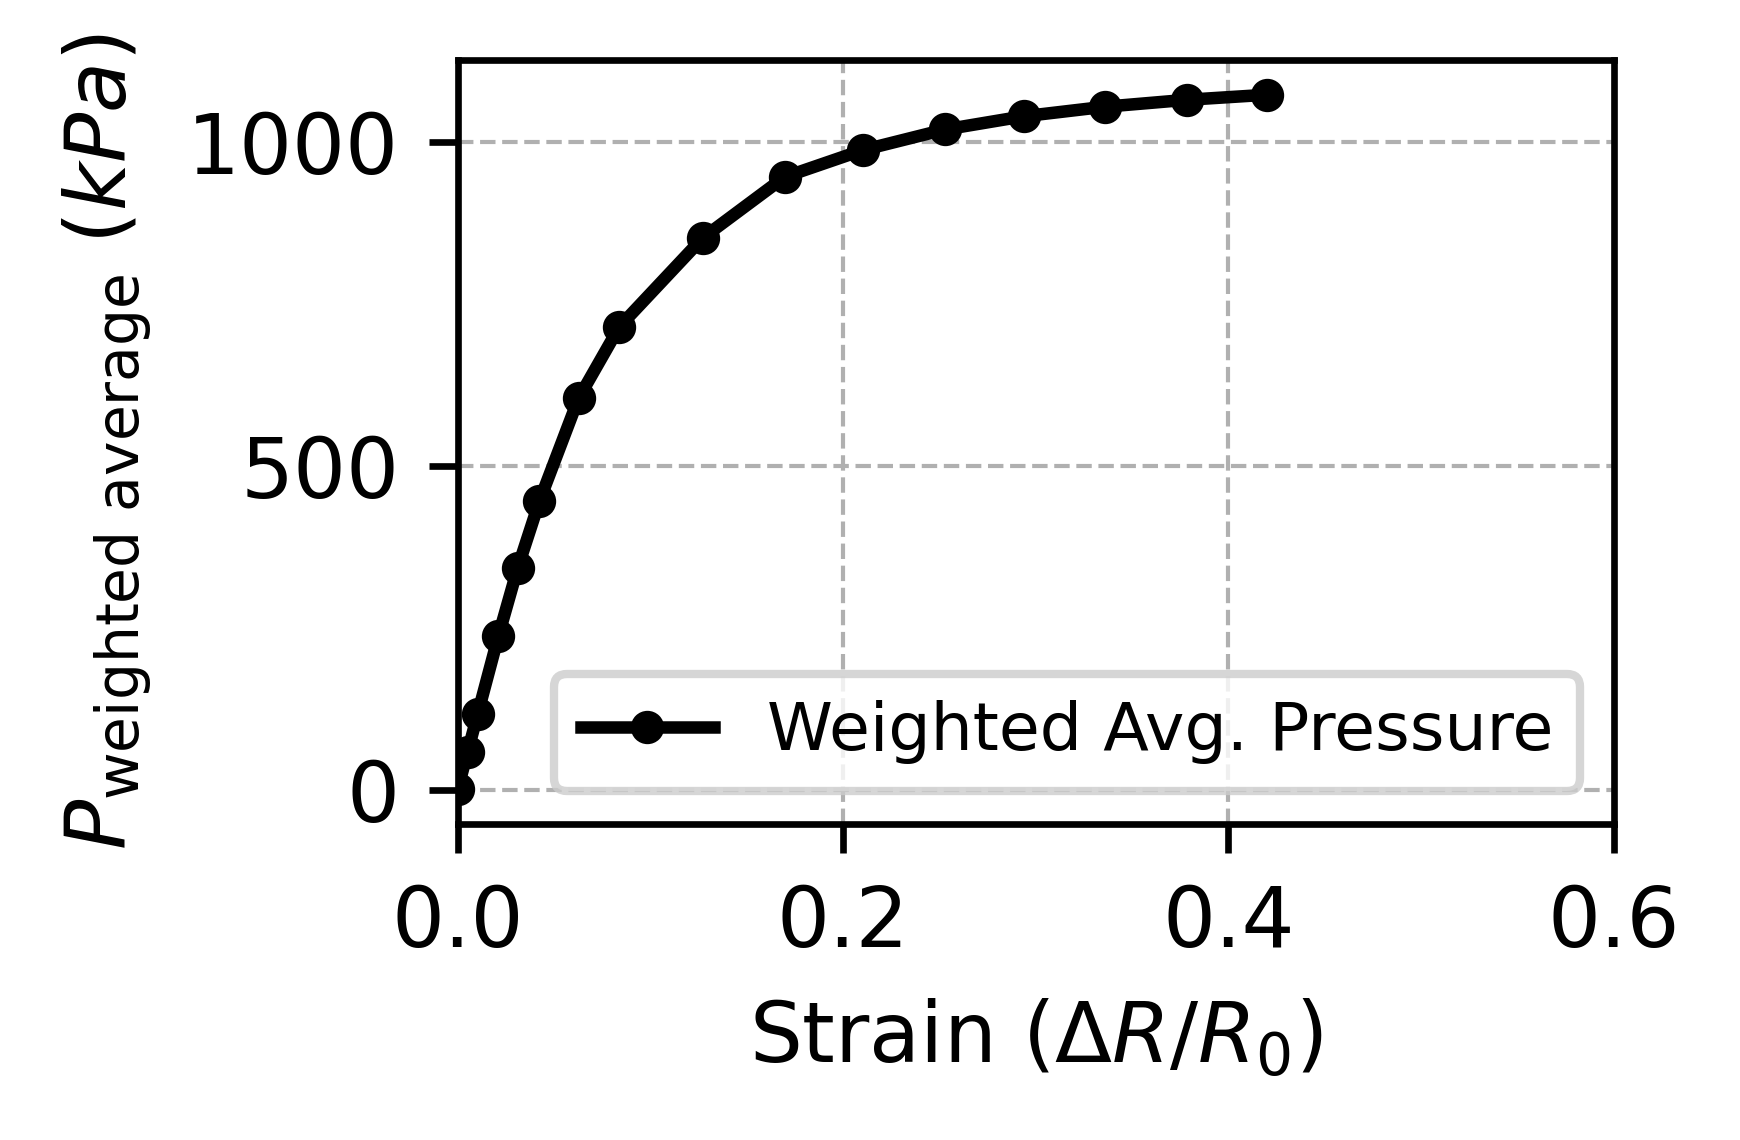

Weighted average pressures saved to ../outputs/weighted_avg_pressures_output.xlsx


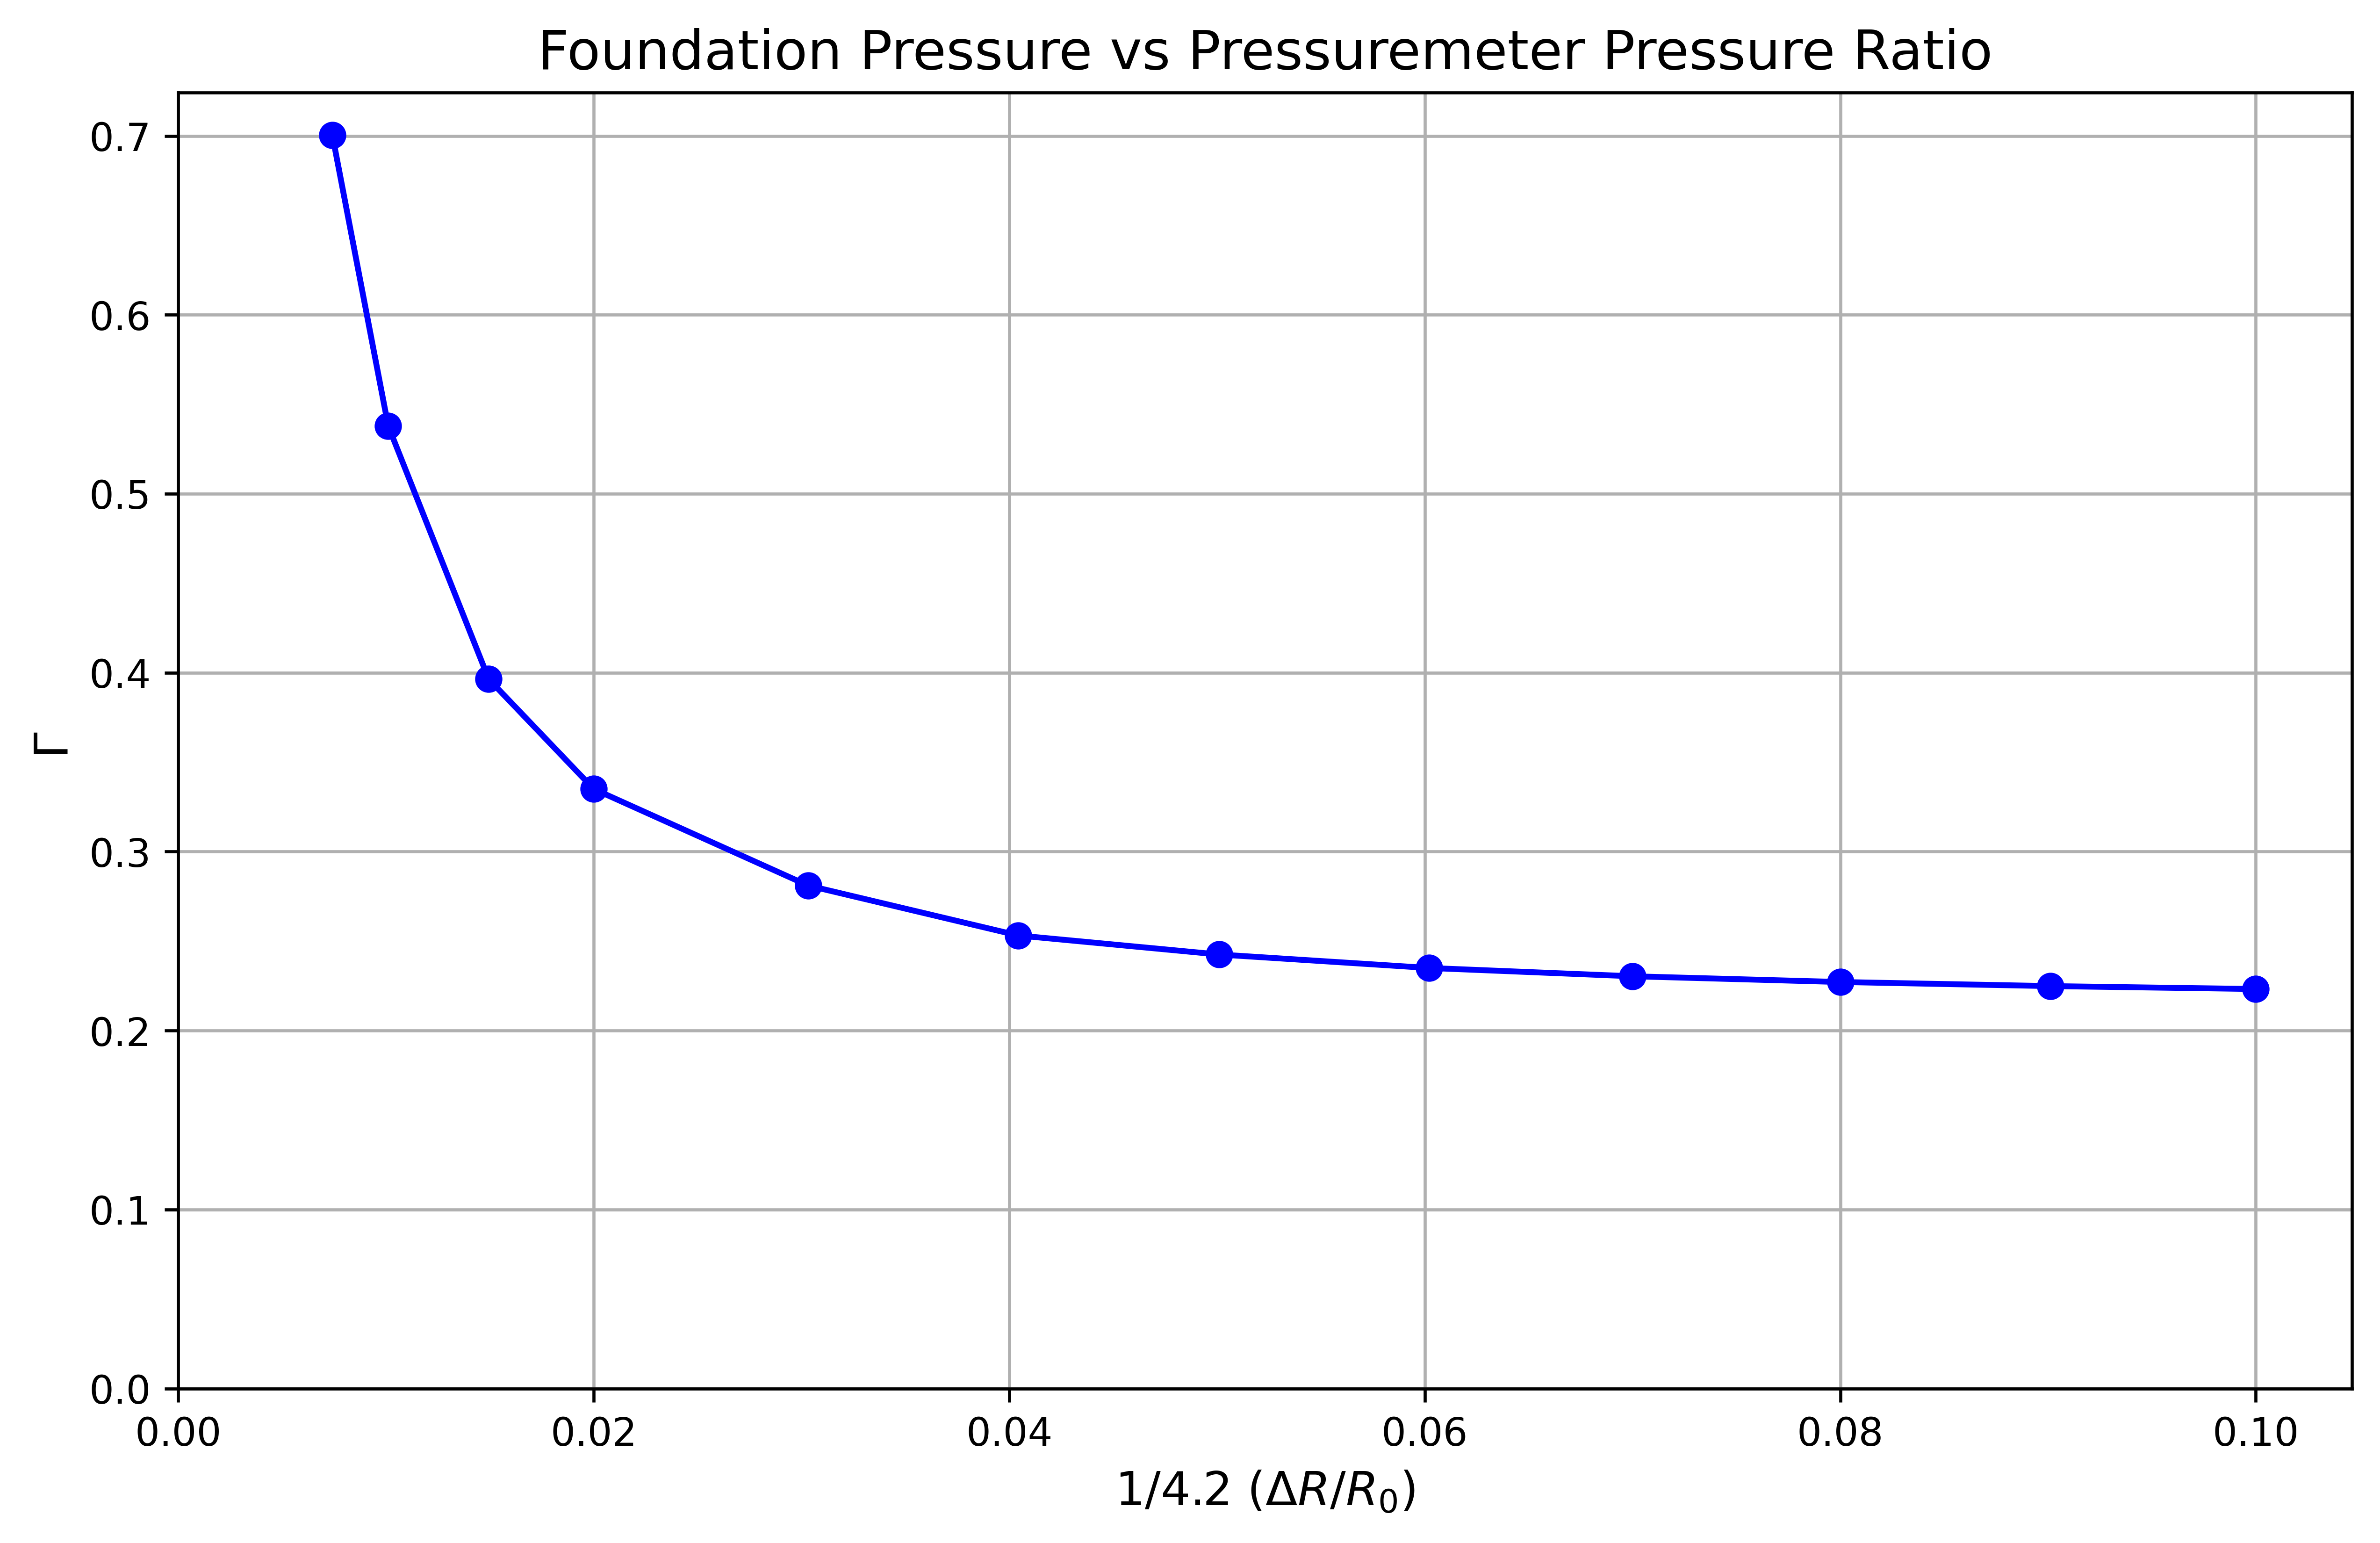

    deltaR/R0         WAP       s/B    s (ft)         Γ         f          pf  \
0    0.000042    0.068193  0.000010  0.000100  8.992896  0.539013    0.613255   
1    0.005172    8.398006  0.001231  0.012315  2.511507  0.539013   21.091653   
2    0.010387   16.865012  0.002473  0.024731  2.087804  0.539013   35.210834   
3    0.021226   34.463283  0.005054  0.050538  1.727594  0.539013   59.538552   
4    0.031161   49.572006  0.007419  0.074194  1.560460  0.539013   77.355114   
5    0.042452   64.546733  0.010108  0.101075  1.437701  0.539013   92.798922   
6    0.062774   87.592202  0.014946  0.149462  1.296130  0.539013  113.530897   
7    0.084000  103.645732  0.020000  0.200000  1.199849  0.539013  124.359235   
8    0.127355  123.544240  0.030323  0.303226  1.074562  0.539013  132.755962   
9    0.169806  137.158899  0.040430  0.404301  0.995687  0.539013  136.567311   
10   0.210452  143.179412  0.050108  0.501075  0.940644  0.539013  134.680851   
11   0.252903  147.765167  0

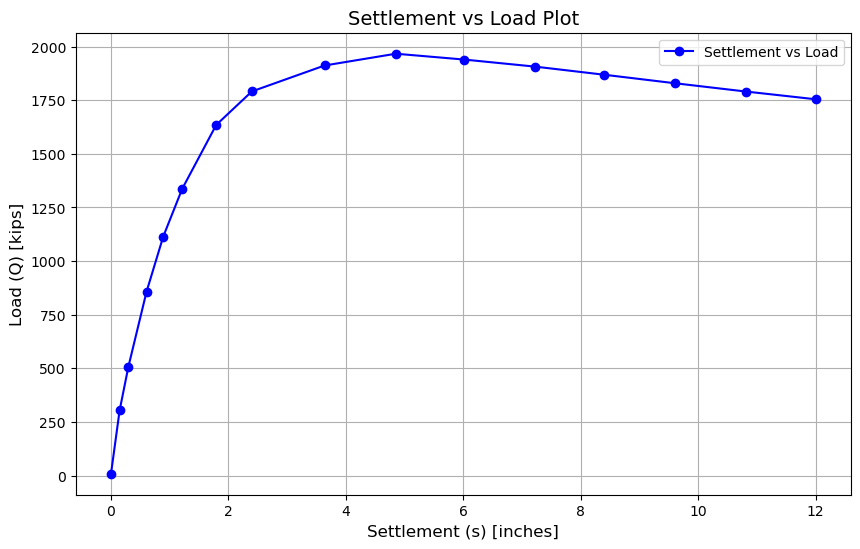

In [3]:
 """
Briaud 2007 Approach: Pressuremeter Data Analysis and Load-Settlement Calculation

This script performs the following:
    1. Reads pressuremeter data from an Excel file.
    2. Processes the data to find the intersection point between two
       straight lines on the loading curve.
    3. Shifs data such that the intersection point becomes the origin and 
        applies Lemee extrapolation and 
    4. Extracts pressures at specified strain levels.
    5. Calculates weighted average pressures based on the strain influence areas.
    6. Computes settlement and load parameters using a composite influence factor.
    7. Generates plots for pressure vs. strain, strain influence area, and
       settlement vs. load.

Author: Brhane W. Ygzaw, PhD.
Date: 03-25-2025
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ------------------------------
# Input Parameters
# ------------------------------
try:
    footing_width = float(input("Enter footing width (in ft): "))
    footing_length = float(input("Enter footing length (in ft): "))
    depth_of_footing = float(input("Enter depth of footing (in ft): "))
    applied_load = float(input("Enter applied load (in lb): "))
    unit_weight = float(input("Enter unit weight (in lb/ft³): "))
    eccentricity = float(input("Enter eccentricity: "))            # e/B
    load_inclination_angle = float(input("Enter Load inclination (in degrees): "))   
    distance_to_slope = float(input("Enter distance to slope (in feet): "))  
    slope_angle = float(input("Enter slope angle (H:V ratio): "))             # slope angle example (3H:1V)

except ValueError:
    print("One or more inputs are invalid. Please enter numerical values.")
    raise

print(f"Footing width: {footing_width} ft")
print(f"Footing length: {footing_length} ft")
print(f"Depth of footing: {depth_of_footing} ft")
print(f"Applied load: {applied_load} lb")
print(f"Unit weight: {unit_weight} lb/ft³")
print(f"eccentricity: {eccentricity} ")
print(f"Unit weight: {load_inclination_angle } degrees")
print(f"Unit weight: {distance_to_slope} feet")
print(f"Unit weight: {slope_angle} ")

# Calculate area (in in²) and foundation pressure (in psi)
area_of_footing = footing_width * footing_length * 144
foundation_pressure = applied_load / area_of_footing

# ------------------------------
# Helper Functions for Data Processing
# ------------------------------
def find_column(data: pd.DataFrame, keyword: str) -> str:
    """
    Dynamically find the column that contains the specified keyword.
    
    Raises:
        ValueError: If no column with the keyword is found.
    """
    for col in data.columns:
        if keyword.lower() in col.lower():
            return col
    raise ValueError(f"Column containing '{keyword}' not found.")


def find_header_row(raw_data: pd.DataFrame, header_keywords: list) -> int:
    """
    Find the header row in the raw data by checking for all header keywords.
    
    Raises:
        ValueError: If header row with the specified keywords is not found.
    """
    for i, row in raw_data.iterrows():
        row_string = " ".join(row.astype(str).values)
        if all(keyword.lower() in row_string.lower() for keyword in header_keywords):
            return i
    raise ValueError(f"Header row with keywords {header_keywords} not found.")


def process_data_and_find_intersection(data: pd.DataFrame):
    """
    Process the data to determine the intersection point between two straight lines.
    
    Returns:
        tuple: (unshifted strain series, reduced pressure series,
                intersection strain, intersection pressure, index of wall point)
    """
    radial_strain_col = find_column(data, "Radial Strain (dr/r0)")
    reduced_pressure_col = find_column(data, "Reduced Pressure (psi)")

    # Remove unloading data (keep only loading until max pressure)
    max_pressure_idx = data[reduced_pressure_col].idxmax()
    loading_data = data.loc[:max_pressure_idx].copy()

    # Calculate differences and change ratios
    loading_data['delta_strain'] = loading_data[radial_strain_col].diff()
    loading_data['delta_pressure'] = loading_data[reduced_pressure_col].diff()
    loading_data['change_ratio'] = loading_data['delta_strain'] / loading_data['delta_pressure']

    # Find index of minimum change ratio (defines second straight line)
    min_change_idx = loading_data['change_ratio'].idxmin()

    # Fit the first straight line using the first two points (adjust to three if needed)
    num_points_to_fit = 2
    initial_points = loading_data.iloc[:num_points_to_fit]
    strain_first_line = initial_points[radial_strain_col]
    pressure_first_line = initial_points[reduced_pressure_col]
    coeff_first_line = np.polyfit(strain_first_line, pressure_first_line, 1)

    # Fit the second straight line using two points near the minimum change ratio
    strain_second_line = loading_data.loc[[min_change_idx - 1, min_change_idx], radial_strain_col]
    pressure_second_line = loading_data.loc[[min_change_idx - 1, min_change_idx], reduced_pressure_col]
    coeff_second_line = np.polyfit(strain_second_line, pressure_second_line, 1)

    # Calculate the intersection point of the two lines
    m1, c1 = coeff_first_line
    m2, c2 = coeff_second_line
    intersection_strain = (c2 - c1) / (m1 - m2)
    intersection_pressure = m1 * intersection_strain + c1

    return (loading_data[radial_strain_col], loading_data[reduced_pressure_col],
            intersection_strain, intersection_pressure, min_change_idx)


def lemee_curve(strain, a, b, c):
    """
    Lemee's curve function for extrapolation.
    """
    return (b * strain ** 2 + a * c) / (strain ** 2 + a)


def perform_lemee_extrapolation(unshifted_strain, reduced_pressure, strain1, pressure1):
    """
    Fit the Lemee curve to the unshifted data and ensure it passes through the wall point.
    
    Returns:
        tuple: (extrapolation strain array, extrapolated pressure array)
    """
    params, _ = curve_fit(lemee_curve, unshifted_strain, reduced_pressure)
    a, b, c = params

    # Adjust 'c' so the curve passes through (strain1, pressure1)
    c = (pressure1 * (strain1 ** 2 + a)) / (b * strain1 ** 2 + a)

    # Extrapolate data up to a specified limit
    extrapolation_strain = np.linspace(strain1, 0.414 + max(unshifted_strain), 100)
    extrapolation_pressure = lemee_curve(extrapolation_strain, a, b, c)

    return extrapolation_strain, extrapolation_pressure


def shift_data_to_intersection(strains, pressures, intersection_strain, intersection_pressure):
    """
    Shift strain and pressure data so that the intersection point becomes the origin.
    
    Returns:
        tuple: (shifted strain data, shifted pressure data)
    """
    shifted_strain = strains - intersection_strain
    shifted_pressure = pressures - intersection_pressure

    # Force the first data point to be exactly zero
    if isinstance(shifted_strain, pd.Series):
        shifted_strain.iloc[0] = 0.0
    else:  # Assume it's a NumPy array
        shifted_strain[0] = 0.0

    if isinstance(shifted_pressure, pd.Series):
        shifted_pressure.iloc[0] = 0.0
    else:
        shifted_pressure[0] = 0.0

    return shifted_strain, shifted_pressure


def extract_pressure_for_strain_level(strain_level, shifted_wall_strain,
                                      shifted_wall_pressure, intersection_strain,
                                      intersection_pressure, valid_shifted_strain,
                                      valid_reduced_pressure, valid_extrapolation_strain,
                                      valid_extrapolation_pressure):
    """
    Extract pressure for a given strain level based on its location.
    
    Logic:
        1. For strain between the wall and intersection, use the straight-line equation.
        2. For strain in the middle region, interpolate from shifted data.
        3. For strain beyond available shifted data, interpolate from extrapolated data.
    """
    if shifted_wall_strain >= strain_level >= 0:
        slope = (0 - shifted_wall_pressure) / (0 - shifted_wall_strain)
        pressure = shifted_wall_pressure + slope * (strain_level - shifted_wall_strain)
    elif strain_level <= max(valid_shifted_strain):
        pressure = np.interp(strain_level, valid_shifted_strain, valid_reduced_pressure)
    else:
        pressure = np.interp(strain_level, valid_extrapolation_strain, valid_extrapolation_pressure)
    return pressure

# ------------------------------
# Excel File Handling and Plotting Setup
# ------------------------------
file_path = "../data/PPMT_K_1.xlsx"
xls = pd.ExcelFile(file_path)

pressures_dict = {}
specified_strains = np.array([
    0.000042, 0.0051723, 0.010387097, 0.021225806, 0.03116129, 0.042451613,
    0.062774194, 0.084, 0.127354839, 0.169806452, 0.210451613, 0.252903226,
    0.294, 0.336, 0.378451613, 0.42
])

plt.figure(figsize=(8, 6), dpi=600)
limit_strain = 0.414
line_color = 'lightgray'

# ------------------------------
# Process Each Sheet in the Excel File
# ------------------------------
for sheet_name in xls.sheet_names:
    raw_data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    header_keywords = ["Radial Strain", "Reduced Pressure"]
    header_row = find_header_row(raw_data, header_keywords)
    data = pd.read_excel(file_path, sheet_name=sheet_name, header=header_row)

    (unshifted_strain, reduced_pressure, intersection_strain,
     intersection_pressure, min_change_idx) = process_data_and_find_intersection(data)

    extrapolation_strain, extrapolation_pressure = perform_lemee_extrapolation(
        unshifted_strain, reduced_pressure, intersection_strain, intersection_pressure)

    shifted_strain, shifted_pressure = shift_data_to_intersection(
        unshifted_strain, reduced_pressure, intersection_strain, intersection_pressure)
    shifted_extrapolation_strain, shifted_extrapolation_pressure = shift_data_to_intersection(
        extrapolation_strain, extrapolation_pressure, intersection_strain, intersection_pressure)

    # Identify wall point (first of the two points used for the second line)
    wall_strain = unshifted_strain.iloc[min_change_idx - 1]
    wall_pressure = reduced_pressure.iloc[min_change_idx - 1]
    shifted_wall_strain = wall_strain - intersection_strain
    shifted_wall_pressure = wall_pressure - intersection_pressure

    # Filter shifted data starting at the wall point
    valid_shifted_strain = shifted_strain[shifted_strain >= shifted_wall_strain]
    valid_reduced_pressure = shifted_pressure[shifted_strain >= shifted_wall_strain]

    # Plot shifted data
    plt.plot(valid_shifted_strain, valid_reduced_pressure, marker='o', linestyle='-',
             label=f"{sheet_name}")

    valid_extrapolation_strain = shifted_extrapolation_strain[
        shifted_extrapolation_strain >= shifted_wall_strain]
    valid_extrapolation_pressure = shifted_extrapolation_pressure[
        shifted_extrapolation_strain >= shifted_wall_strain]
    plt.plot(valid_extrapolation_strain, valid_extrapolation_pressure, linestyle='--')

    # Plot the straight line from wall point to intersection
    plt.plot([shifted_wall_strain, 0], [shifted_wall_pressure, 0], 'k-')
    plt.plot(0, 0, 'ko', markersize=8)

    # Extract pressures at specified strain levels
    pressures_for_strains = []
    for strain_level in specified_strains:
        pressure = extract_pressure_for_strain_level(
            strain_level,
            shifted_wall_strain,
            shifted_wall_pressure,
            0,  # Intersection strain is 0 after shifting
            0,  # Intersection pressure is 0 after shifting
            valid_shifted_strain,
            valid_reduced_pressure,
            valid_extrapolation_strain,
            valid_extrapolation_pressure
        )
        pressures_for_strains.append(pressure)

    pressures_dict[sheet_name] = pressures_for_strains

    # Determine limit pressure at strain = limit_strain
    limit_pressure = np.interp(limit_strain, valid_extrapolation_strain, valid_extrapolation_pressure)
    plt.axhline(y=limit_pressure, color=line_color, linestyle='--')
    plt.axvline(x=limit_strain, color=line_color, linestyle='--')
    plt.scatter(limit_strain, limit_pressure, color='red', zorder=5)

plt.xlabel(r'Radial Strain ($\Delta R / R_0$)', fontsize=12)
plt.ylabel('Pressure (psi)', fontsize=12)
plt.title('Rezero to Wall Point', fontsize=14)
plt.grid(True)
plt.legend()
plt.savefig("../outputs/rezero_wall_point_plot.png", dpi=600, bbox_inches='tight')
plt.show()

# Create and save a combined pressure table
pressure_df = pd.DataFrame({"Strain Level": specified_strains})
for sheet, pressures in pressures_dict.items():
    pressure_df[sheet] = pressures

print("Combined Pressure Table for Specified Strain Levels:")
print(pressure_df)
output_file_path = "../outputs/combined_pressure_table_with_extraction.xlsx"
pressure_df.to_excel(output_file_path, index=False)
print(f"Combined pressure table saved to {output_file_path}")

# ------------------------------
# Strain Influence and Footing Cases
# ------------------------------
def compute_max_strain(q_net, sigma_eff):
    """
    Compute the maximum strain based on net pressure and effective stress.
    """
    if q_net > 0 and sigma_eff > 0:
        return 0.5 + 0.1 * np.sqrt(q_net / sigma_eff)
    else:
        return 0.5


def strain_influence_area(depth_of_footing, unit_weight, footing_width,
                          footing_length, applied_load):
    """
    Calculate strain influence parameters based on footing geometry.
    
    Returns:
        tuple: (strains array, depths array, zero strain depth, max strain)
    """
    L_B_ratio = footing_length / footing_width
    area_of_footing = footing_width * footing_length
    footing_pressure = applied_load / area_of_footing

    if L_B_ratio == 1:
        print("Case I: Square or Circular Footing (L/B = 1)")
        strain_at_footing = 0.1
        depth_max_strain = depth_of_footing + footing_width / 2
        overburden_pressure = unit_weight * depth_max_strain
        q_net = footing_pressure - overburden_pressure
        max_strain = compute_max_strain(q_net, overburden_pressure)
        zero_strain_depth = 2 * footing_width + depth_of_footing

        depths = np.linspace(depth_of_footing, zero_strain_depth, 100)
        strains = np.piecewise(
            depths,
            [depths <= depth_of_footing + footing_width / 2,
             (depths > depth_of_footing + footing_width / 2) & (depths <= zero_strain_depth)],
            [lambda z: strain_at_footing + (max_strain - strain_at_footing) *
             (z - depth_of_footing) / (footing_width / 2),
             lambda z: max_strain * (1 - (z - (depth_of_footing + footing_width / 2)) /
             (zero_strain_depth - depth_of_footing - footing_width / 2))]
        )

    elif 1 < L_B_ratio < 10:
        print("Case II: Rectangular Footing (1 < L/B < 10)")
        strain_at_footing = 0.1 + 0.0111 * (L_B_ratio - 1)
        footing_max_strain_depth = 0.5 * footing_width + 0.0555 * (L_B_ratio - 1) * footing_width
        zero_strain_depth = (2 + 0.222 * (L_B_ratio - 1)) * footing_width + depth_of_footing
        depth_max_strain = depth_of_footing + footing_max_strain_depth
        overburden_pressure = unit_weight * depth_max_strain
        q_net = footing_pressure - overburden_pressure
        max_strain = compute_max_strain(q_net, overburden_pressure)

        depths = np.linspace(depth_of_footing, zero_strain_depth, 100)
        strains = np.piecewise(
            depths,
            [depths <= depth_of_footing + footing_max_strain_depth,
             (depths > depth_of_footing + footing_max_strain_depth) & (depths <= zero_strain_depth)],
            [lambda z: strain_at_footing + (max_strain - strain_at_footing) *
             (z - depth_of_footing) / footing_max_strain_depth,
             lambda z: max_strain * (1 - (z - (depth_of_footing + footing_max_strain_depth)) /
             (zero_strain_depth - depth_of_footing - footing_max_strain_depth))]
        )

    else:
        print("Case III: Strip Footing (L/B >= 10)")
        strain_at_footing = 0.2
        depth_max_strain = depth_of_footing + footing_width
        overburden_pressure = unit_weight * depth_max_strain
        q_net = footing_pressure - overburden_pressure
        max_strain = compute_max_strain(q_net, overburden_pressure)
        zero_strain_depth = 4 * footing_width + depth_of_footing

        depths = np.linspace(depth_of_footing, zero_strain_depth, 100)
        strains = np.piecewise(
            depths,
            [depths <= depth_of_footing + footing_width,
             (depths > depth_of_footing + footing_width) & (depths <= zero_strain_depth)],
            [lambda z: strain_at_footing + (max_strain - strain_at_footing) *
             (z - depth_of_footing) / footing_width,
             lambda z: max_strain * (1 - (z - (depth_of_footing + footing_width)) /
             (zero_strain_depth - depth_of_footing - footing_width))]
        )

    return strains, depths, zero_strain_depth, max_strain


def get_strain_at_depth(depth, depths, strains):
    """
    Interpolate to find the strain at a given depth.
    """
    return np.interp(depth, depths, strains)


def plot_strain_influence(strains, depths):
    """
    Plot the strain influence area.
    """
    plt.figure(figsize=(6, 8))
    plt.plot(strains, depths, label='Strain Influence Area')
    plt.fill_betweenx(depths, 0, strains, color='lightblue', alpha=0.5)
    plt.gca().invert_yaxis()
    plt.xlabel("Strain")
    plt.ylabel("Depth (ft)")
    plt.title("Strain Influence Area (Shaded)")
    plt.grid(True)
    plt.legend()
    plt.savefig("../outputs/strain_influence_plot.png", dpi=600, bbox_inches='tight')
    plt.show()


# Calculate strain influence area for the given footing case
strains, depths, zero_strain_depth, max_strain_depth = strain_influence_area(
    depth_of_footing, unit_weight, footing_width, footing_length, applied_load)

plot_strain_influence(strains, depths)

# ------------------------------
# Test Depth Extraction and Dynamic Area Calculation
# ------------------------------
test_depths = []
for sheet_name in xls.sheet_names:
    try:
        depth = float(sheet_name.split()[0])
        test_depths.append(depth)
    except ValueError:
        print(f"Invalid sheet name format: {sheet_name}")
        continue
test_depths.sort()
print(f"Test depths (ft): {test_depths}")


def needs_double_trapezoid(test_depth, max_strain_depth, prev_depth, next_depth):
    """
    Determine if a double trapezoid approach is needed for the middle test.
    """
    return prev_depth < max_strain_depth <= next_depth


def calculate_dynamic_areas(test_depths, depth_of_footing, zero_strain_depth,
                            strains, depths, max_strain_depth):
    """
    Calculate strain influence areas dynamically using the trapezoidal rule.
    
    Returns:
        tuple: (list of areas, total area)
    """
    areas = []
    total_area = 0

    max_strain_value = np.interp(max_strain_depth, depths, strains)

    for i in range(len(test_depths)):
        if i == 0:
            next_depth = test_depths[i + 1] if i + 1 < len(test_depths) else test_depths[i]
            half_depth = 0.5 * (next_depth + test_depths[i])
            strain_at_footing = np.interp(depth_of_footing, depths, strains)
            strain_halfway = np.interp(half_depth, depths, strains)
            area = 0.5 * ((test_depths[i] - depth_of_footing) +
                          0.5 * (next_depth - test_depths[i])) * (strain_at_footing + strain_halfway)
        elif i == len(test_depths) - 1:
            prev_depth = test_depths[i - 1]
            half_above = 0.5 * (test_depths[i] + prev_depth)
            half_below = 0.5 * (test_depths[i] + zero_strain_depth)
            strain_half_above = np.interp(half_above, depths, strains)
            strain_half_below = np.interp(half_below, depths, strains)
            area = 0.5 * (0.5 * (test_depths[i] - prev_depth) +
                          0.5 * (zero_strain_depth - test_depths[i])) * (strain_half_above + strain_half_below)
        else:
            prev_depth = test_depths[i - 1]
            next_depth = test_depths[i + 1]
            half_above = 0.5 * (test_depths[i] + prev_depth)
            half_below = 0.5 * (test_depths[i] + next_depth)
            strain_half_above = np.interp(half_above, depths, strains)
            strain_half_below = np.interp(half_below, depths, strains)

            if needs_double_trapezoid(test_depths[i], max_strain_depth, prev_depth, next_depth):
                print(f"Double trapezoid detected for test depth {test_depths[i]}")
                upper_half_prev = 0.5 * (test_depths[i] + prev_depth)
                upper_area = 0.5 * (max_strain_depth - upper_half_prev) * (strain_half_above + max_strain_value)
                lower_half_next = 0.5 * (test_depths[i] + next_depth)
                lower_area = 0.5 * (lower_half_next - max_strain_depth) * (max_strain_value + strain_half_below)
                area = upper_area + lower_area
            else:
                area = 0.5 * (0.5 * (test_depths[i] - prev_depth) +
                              0.5 * (next_depth - test_depths[i])) * (strain_half_above + strain_half_below)
        areas.append(area)
        total_area += area

    return areas, total_area


areas, total_area = calculate_dynamic_areas(test_depths, depth_of_footing,
                                             zero_strain_depth, strains, depths,
                                             max_strain_depth)

# ------------------------------
# Weighted Average Pressure Calculation
# ------------------------------
def calculate_weighted_average_pressure(specified_strains, pressures_dict, areas, total_area):
    """
    Calculate weighted average pressures based on strain influence areas.
    
    Returns:
        list of weighted average pressures.
    """
    weighted_avg_pressures = []
    for strain_level in specified_strains:
        weighted_pressure_sum = 0
        for i, sheet_name in enumerate(pressures_dict.keys()):
            depth_pressure = pressures_dict[sheet_name]
            strain_idx = np.where(specified_strains == strain_level)[0][0]
            pressure_at_depth = depth_pressure[strain_idx]
            weighted_pressure_sum += pressure_at_depth * areas[i]
        weighted_avg_pressure = weighted_pressure_sum / total_area
        weighted_avg_pressures.append(weighted_avg_pressure)
    return weighted_avg_pressures


weighted_avg_pressures = calculate_weighted_average_pressure(specified_strains,
                                                             pressures_dict, areas, total_area)
weighted_avg_df = pd.DataFrame({
    "Strain Level": specified_strains,
    "Weighted Average Pressure": weighted_avg_pressures
})
weighted_avg_df["Weighted Average Pressure (kPa)"] = weighted_avg_df["Weighted Average Pressure"] * 6.89476

print(weighted_avg_df)
output_file_path = "../outputs/weighted_avg_pressures_output.xlsx"
weighted_avg_df.to_excel(output_file_path, index=False)
# Plot Weighted Average Pressure vs. Strain (in kPa)
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 2), dpi=600)
plt.plot(weighted_avg_df["Strain Level"], weighted_avg_df["Weighted Average Pressure (kPa)"],
         marker='o', markersize=3, linestyle='-', color='black', label='Weighted Avg. Pressure')

plt.xlabel(r'Strain ($\Delta R / R_0$)', fontsize=10)
plt.ylabel(r'$P_{\mathrm{weighted\ average}}\ (kPa)$', fontsize=10)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', fontsize=8)
plt.xlim([0, 0.6])
plt.tight_layout()

# Save plot
plot_path = "../outputs/average_pressure_vs_strain_kpa.png"
plt.savefig(plot_path, dpi=600, bbox_inches='tight')
plt.show()

print(f"Weighted average pressures saved to {output_file_path}")

# ------------------------------
# Additional Plot: Footing Pressure vs Pressuremeter Pressure Ratio
# ------------------------------
def power_decay(x, a, b, C):
    """
    Power decay model: y = a * x^(-b) + C.
    """
    return a * np.power(x, -b) + C


def calculate_r_squared(y_true, y_pred):
    """
    Calculate the R² value.
    """
    residuals = y_true - y_pred
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


strain_levels_scaled = specified_strains / 4.2
pressure_ratios = foundation_pressure / weighted_avg_df["Weighted Average Pressure"]

mask = strain_levels_scaled >= 0.0051723
filtered_strain_levels_scaled = strain_levels_scaled[mask]
filtered_pressure_ratios = pressure_ratios[mask]

plt.figure(figsize=(10, 6), dpi=600)
plt.plot(filtered_strain_levels_scaled, filtered_pressure_ratios, marker='o', color='b')
plt.xlabel(r'1/4.2 ($\Delta R / R_0$)', fontsize=12)
plt.ylabel('Γ', fontsize=12)
plt.title('Foundation Pressure vs Pressuremeter Pressure Ratio', fontsize=14)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(True)
# plt.legend()
plt.savefig("../outputs/foundation_pressure_ratio_plot.png", dpi=600, bbox_inches='tight')
plt.show()


# ------------------------------
# Settlement and Load Calculations
# ------------------------------

def calculate_gamma_formula(strain_levels_scaled):
    """
    Calculate gamma values using the formula:
    gamma = 0.4255 * (strain_levels_scaled) ^ -0.265
    """
    return 0.4255 * (strain_levels_scaled ** -0.265)


def calculate_settlement_and_load(strain_levels, weighted_avg_pressures,
                                  footing_width, footing_length, eccentricity,
                                  load_inclination_angle, distance_to_slope):
    """
    Calculate settlement and load for each strain level.
    
    Returns:
        DataFrame with calculated parameters.
    """
    results = []
    strain_levels_scaled = strain_levels / 4.2
    gamma_values = calculate_gamma_formula(strain_levels_scaled)
    area_of_footing = footing_width * footing_length * 144  # in in²

    for i, deltaR_R0 in enumerate(strain_levels):
        avg_pressure = weighted_avg_pressures[i]

        # Influence factor for foundation shape
        L_B_ratio = footing_length / footing_width
        fL_B = 0.8 + 0.2 * (footing_width / footing_length)

        # Influence factor for eccentricity
        fe_edge = 1 - np.sqrt(eccentricity)
        fe_center = 1 - 0.33 * eccentricity

        # Influence factor for load inclination
        fdelta_edge = 1 - np.sqrt(load_inclination_angle / 360)
        fdelta_center = 1 - (load_inclination_angle / 90) ** 2

        # Influence factor for proximity to slope
        if distance_to_slope / footing_width >= 10:
            fbeta_d = 1
        else:
            fbeta_d = 0.8 * (1 + distance_to_slope / footing_width) ** 0.1

        # Composite influence factor
        f = fL_B * fe_edge * fdelta_edge * fbeta_d
        gamma = gamma_values[i]
        s_B = deltaR_R0 / 4.2
        s = footing_width * s_B  # Settlement in ft
        Pf = avg_pressure * gamma
        Q = Pf * area_of_footing / 1000  # Load in kips

        results.append({
            'deltaR/R0': deltaR_R0,
            'WAP': avg_pressure,
            's/B': s_B,
            's (ft)': s,
            'Γ': gamma,
            'f': f,
            'pf': Pf,
            'Q': Q
        })

    return pd.DataFrame(results)


strain_levels = specified_strains
weighted_avg_pressures_series = weighted_avg_df['Weighted Average Pressure']

settlement_load_df = calculate_settlement_and_load(
    strain_levels, weighted_avg_pressures_series, footing_width,
    footing_length, eccentricity, load_inclination_angle, distance_to_slope
)

print(settlement_load_df)
output_file_path = "../outputs/settlement_load_calculations.xlsx"
settlement_load_df.to_excel(output_file_path, index=False)
print(f"Settlement and load calculations saved to {output_file_path}")

def plot_settlement_vs_load(settlement_load_df):
    """
    Plot Settlement (in inches) vs Load (in kips).
    """
    settlement_load_df["Settlement (s) (in)"] = settlement_load_df["s (ft)"].abs() * 12
    plt.figure(figsize=(10, 6))
    plt.plot(settlement_load_df["Settlement (s) (in)"],
             settlement_load_df["Q"], marker='o', color='b', label='Settlement vs Load')
    plt.xlabel('Settlement (s) [inches]', fontsize=12)
    plt.ylabel('Load (Q) [kips]', fontsize=12)
    plt.title('Settlement vs Load Plot', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("../outputs/settlement_vs_load_plot.png", dpi=600, bbox_inches='tight')
    plt.show()

plot_settlement_vs_load(settlement_load_df)
